In [8]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
x_train = pd.read_csv(r"./x_train.csv")
x_test = pd.read_csv(r"./x_test.csv")
y_train = pd.read_csv(r"./y_train.csv")
y_test = pd.read_csv(r"./y_test.csv")

Best parameters:  {'xgb__learning_rate': 0.01, 'xgb__n_estimators': 200}
Best score:  0.8897648376259799
Classification report: 
               precision    recall  f1-score   support

       False       0.93      0.94      0.93        80
        True       0.86      0.84      0.85        38

    accuracy                           0.91       118
   macro avg       0.90      0.89      0.89       118
weighted avg       0.91      0.91      0.91       118



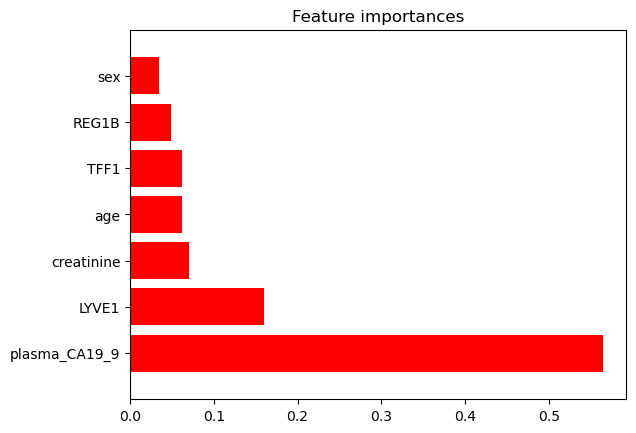

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import  classification_report, balanced_accuracy_score


# Create a pipeline for scaling and XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(eval_metric='logloss'))
])

# Define the grid of parameters to search over
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Select the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(x_test)

# Print the classification report
print("Classification report: \n", classification_report(y_test, y_pred))


# Get feature importances from the best model
importances = best_model.named_steps['xgb'].feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.barh(range(x_train.shape[1]), importances[indices],
       color="r", align="center")
plt.yticks(range(x_train.shape[1]), x_train.columns[indices])
plt.ylim([-1, x_train.shape[1]])
plt.show()

In [18]:
print(y_pred)

[1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 0 0 0 1 0]


In [20]:
common_path = 'data.py'

# Load the common module dynamically
exec(open(common_path).read())

# Function to update the first element
def update_first_element(new_value):
    global a
    a[0] = new_value

# Function to display the current value of 'a'
def display_shared_variable():
    print("Current value of 'a' in notebook1:", a)

# Update and display
update_first_element(list(y_pred))
display_shared_variable()

# Save the updated value back to common.py
with open(common_path, 'w') as f:
    f.write(f'a = {a}')

Current value of 'a' in notebook1: [[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], [True, False, True, False, True, False, False, False, True, False, True, False, True, False, True, False, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, False, False, True, False, True, True, False, False, False, False, True, True, False, True, False, True, False, True, False, True, True, True, False, False, False, False, False, True, True, False, False, False, False, True, True, False, True, False, True, False, False, True, False, False, False, True, False, False, True, False, True, True, False, True, False, True, False, True, 